In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

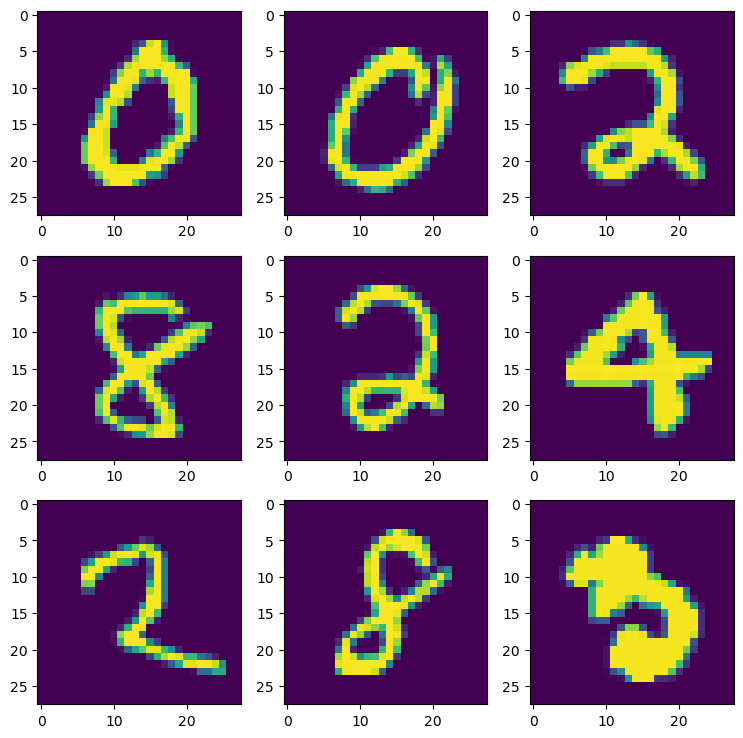

In [4]:
fig, axs = plt.subplots(3, 3, figsize=(9, 9))
axs = axs.ravel()

for i, j in enumerate(tf.random.uniform((9,), 0, 60000)):
    axs[i].imshow(x_train[int(j)])
plt.show()

In [5]:
n_classes = len(set(y_train))

x_train_r = x_train.reshape(x_train.shape[0], -1)
x_test_r = x_test.reshape(x_test.shape[0], -1)

y_train_oh = keras.utils.to_categorical(y_train, num_classes=n_classes)
y_test_oh = keras.utils.to_categorical(y_test, num_classes=n_classes)

print(x_train_r.shape, x_test_r.shape, y_train_oh.shape, y_test_oh.shape)


n_samples = x_train_r.shape[0]
n_features = x_train_r.shape[1]

print(n_samples, n_features, n_classes)

(60000, 784) (10000, 784) (60000, 10) (10000, 10)
60000 784 10


In [6]:
keras.backend.clear_session()

inputs = keras.Input(shape=(n_features,))
x = keras.layers.Dense(512, activation='tanh', kernel_initializer='glorot_normal')(inputs)
x = keras.layers.Dense(256, activation='tanh', kernel_initializer='glorot_normal')(x)
outputs = keras.layers.Dense(n_classes, activation='softmax', kernel_initializer='glorot_normal')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics='accuracy')

EPOCHS = 100
history = model.fit(x_train_r, y_train_oh, epochs=EPOCHS, batch_size=128)

Epoch 1/100
469/469 [==============================] - 2s 3ms/step - loss: 0.5898 - accuracy: 0.8351
Epoch 2/100
469/469 [==============================] - 1s 3ms/step - loss: 0.3141 - accuracy: 0.9140
Epoch 3/100
469/469 [==============================] - 1s 3ms/step - loss: 0.2616 - accuracy: 0.9251
Epoch 4/100
469/469 [==============================] - 1s 3ms/step - loss: 0.2312 - accuracy: 0.9326
Epoch 5/100
469/469 [==============================] - 1s 3ms/step - loss: 0.2074 - accuracy: 0.9414
Epoch 6/100
469/469 [==============================] - 1s 3ms/step - loss: 0.1903 - accuracy: 0.9447
Epoch 7/100
469/469 [==============================] - 1s 3ms/step - loss: 0.1790 - accuracy: 0.9480
Epoch 8/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1662 - accuracy: 0.9516
Epoch 9/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1556 - accuracy: 0.9551
Epoch 10/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1494 - accura

In [8]:
# default glorot_uniform loss 0.0593 acc 0.9814
 # glorot/xavier normal loss 0.0543 acc 0.9825

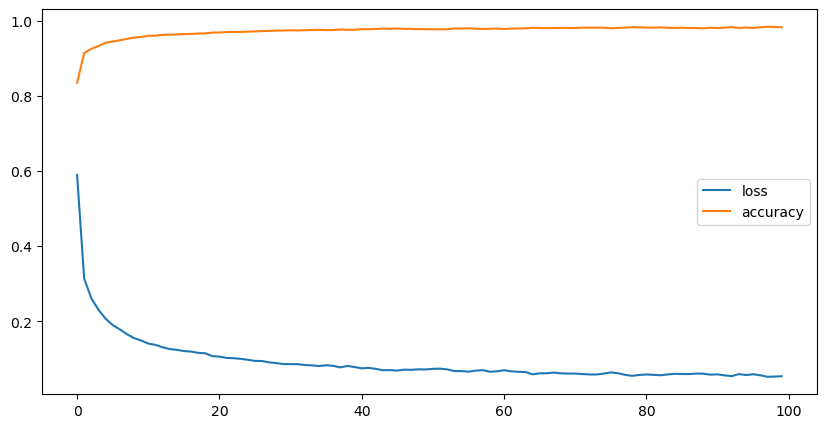

In [9]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(history.history['loss'], label='loss')
ax.plot(history.history['accuracy'], label='accuracy')
ax.legend()

plt.show()

In [10]:
test_score = model.evaluate(x_test_r, y_test_oh)
print(test_score[0], test_score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.1003 - accuracy: 0.9684
0.10030630230903625 0.9684000015258789


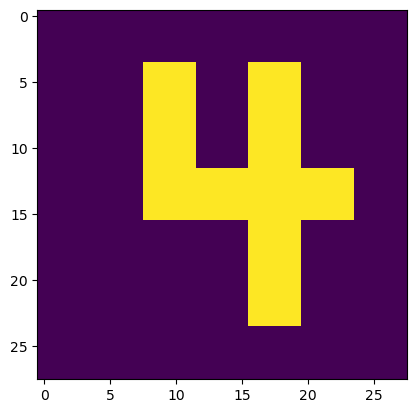

In [11]:
m = [[0,0,0,0,0,0,0],
     [0,0,1,0,1,0,0],
     [0,0,1,0,1,0,0],
     [0,0,1,1,1,1,0],
     [0,0,0,0,1,0,0],
     [0,0,0,0,1,0,0],
     [0,0,0,0,0,0,0]]
m = np.concatenate([np.concatenate([[x]*4 for x in y]*4) for y in m])
plt.imshow(m.reshape(28,28))
plt.show()

In [12]:
m_reshaped = m.reshape(1, -1)
prediction = model.predict(m_reshaped)
np.argmax(prediction)


1/1 [==============================] - 0s 85ms/step


4

In [13]:
keras.__version__

'2.10.0'